In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_22708\1919720498.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,C,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,D,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,B,13.3,Yes,No,Master's,Medium,6,4.5


In [5]:
#df.drop(['Student_ID','First_Name','Last_Name','Email','Attendance (%)','Midterm_Score','Final_Score','Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Total_Score'],
#        axis=1, inplace=True) # set axis = 1 to remove columns

df.drop(['Student_ID','First_Name','Last_Name','Email','Midterm_Score','Final_Score','Quizzes_Avg','Projects_Score','Total_Score'],
        axis=1, inplace=True) # set axis = 1 to remove columns

df.head()

,Gender,Age,Department,Attendance (%),Assignments_Avg,Participation_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,73.69,7.34,C,10.3,Yes,No,Master's,Medium,1,5.9
1,Male,18,Business,97.71,74.23,8.80,B,27.1,No,No,High School,Low,4,4.3
2,Male,24,Engineering,99.52,85.85,0.47,C,12.4,Yes,No,High School,Low,9,6.1
3,Female,24,Engineering,90.38,68.10,0.42,D,25.5,No,Yes,High School,Low,8,4.9
4,Female,23,CS,59.41,67.66,6.43,B,13.3,Yes,No,Master's,Medium,6,4.5


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
find_category = df.dtypes == object
find_category_list = df.columns[find_category].to_list() # Lấy tên các cột là biến phân loại (kiểu object) thành danh sách
find_category_list


['Gender',
 'Department',
 'Grade',
 'Extracurricular_Activities',
 'Internet_Access_at_Home',
 'Parent_Education_Level',
 'Family_Income_Level']

In [7]:
# Áp dụng LabelEncoder cho từng cột phân loại
# Duyệt từng cột trong danh sách, và dùng LabelEncoder để mã hóa giá trị văn bản thành số nguyên
df[find_category_list] = df[find_category_list].apply(lambda col: le.fit_transform(col))

print("biến LabelEncoder nò:",le.classes_)  # Xem danh sách các nhãn mà LabelEncoder đã học được
df.head()

biến LabelEncoder nò: ['High' 'Low' 'Medium']


,Gender,Age,Department,Attendance (%),Assignments_Avg,Participation_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,3,97.36,73.69,7.34,2,10.3,1,0,2,2,1,5.9
1,1,18,0,97.71,74.23,8.80,1,27.1,0,0,1,1,4,4.3
2,1,24,2,99.52,85.85,0.47,2,12.4,1,0,1,1,9,6.1
3,0,24,2,90.38,68.10,0.42,3,25.5,0,1,1,1,8,4.9
4,0,23,1,59.41,67.66,6.43,1,13.3,1,0,2,2,6,4.5


In [8]:
"""from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in find_category_list:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le  # Lưu encoder của cột này


print("Gender:", encoders['Gender'].classes_)
print("Department:", encoders['Department'].classes_)
print("Grade:", encoders['Grade'].classes_)
print("Family_Income_Level:", encoders['Family_Income_Level'].classes_)
df.head()
"""

'from sklearn.preprocessing import LabelEncoder\n\nencoders = {}\n\nfor col in find_category_list:\n    le = LabelEncoder()\n    df[col] = le.fit_transform(df[col])\n    encoders[col] = le  # Lưu encoder của cột này\n\n\nprint("Gender:", encoders[\'Gender\'].classes_)\nprint("Department:", encoders[\'Department\'].classes_)\nprint("Grade:", encoders[\'Grade\'].classes_)\nprint("Family_Income_Level:", encoders[\'Family_Income_Level\'].classes_)\ndf.head()\n'

In [9]:
# chia dữ liệu train, test

from sklearn.model_selection import train_test_split

"""train, test = train_test_split(df,test_size=0.2, random_state=42)
x_train = train.drop(columns=['Grade'])
y_train = train['Grade']

x_test = test.drop(columns=['Grade'])
y_test = test['Grade']
"""
# 👉 Chia tập dữ liệu thành train và test theo tỷ lệ 80-20
# Sử dụng stratify để đảm bảo phân bố các lớp (Grade) giống nhau ở cả hai tập
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Grade'])

x_train = train.drop(columns=['Grade'])
y_train = train['Grade']

x_test = test.drop(columns=['Grade'])
y_test = test['Grade']

In [10]:
# Train model
"""
Đây là một thuật toán ensemble (tổng hợp nhiều cây quyết định nhỏ) sử dụng kỹ thuật Gradient Boosting để cải thiện dần kết quả phân loại qua từng vòng lặp.

Nó huấn luyện một chuỗi các cây quyết định yếu (weak learners).

Mỗi cây mới sẽ học sai số (residual) của mô hình trước đó.

Mục tiêu là giảm loss function qua từng bước bằng cách đi theo gradient giảm dần.


"""
from sklearn.ensemble import GradientBoostingClassifier # Classifier dùng cho phân loại

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [11]:
# tính toán Accuracy trên test
Accuracy = model.score(x_test,y_test)
print(Accuracy)

0.603


In [12]:
# XGBoost (pip install xgboost)
import xgboost as xgb

"""model_xgb = xgb.XGBClassifier(random_state=42, n_etimators=100)
model_xgb.fit(x_train,y_train)

print("độ chính xác khi huấn luyện mô hình",model_xgb.score(x_test,y_test))
"""
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

model_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)

model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score (weighted): {f1:.4f}")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.5660
✅ F1-score (weighted): 0.5452
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.60      0.72      0.66       562
           2       0.50      0.40      0.44       399
           3       0.00      0.00      0.00         8

    accuracy                           0.57      1000
   macro avg       0.27      0.28      0.27      1000
weighted avg       0.53      0.57      0.55      1000



d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\MINI_Project\DoAn3\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


d:\MINI_Project\DoAn3\venv\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 3000x1500 with 0 Axes>

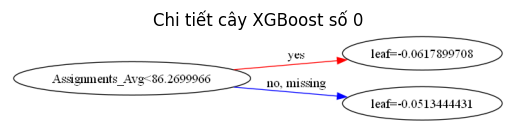

In [13]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(30, 15))  # tăng kích thước để hiển thị chi tiết
plot_tree(model_xgb, num_trees=0, rankdir='LR')  # Left to Right
plt.title("Chi tiết cây XGBoost số 0")
plt.show()


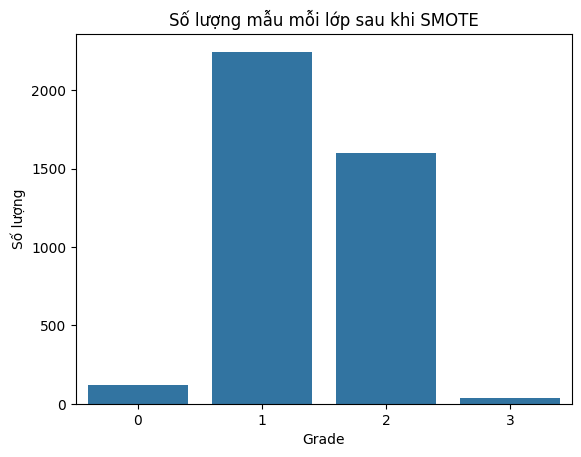

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Số lượng mẫu mỗi lớp sau khi SMOTE")
plt.xlabel("Grade")
plt.ylabel("Số lượng")
plt.show()


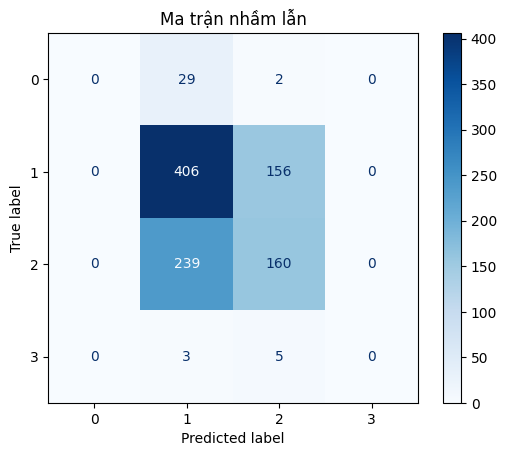

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_xgb.classes_)
disp.plot(cmap="Blues")
plt.title("Ma trận nhầm lẫn")
plt.show()


- Trọng số tính theo công thức:

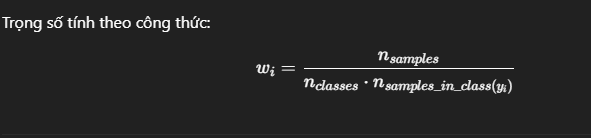

Dùng 'balanced' để tự động tính theo phân bố lớp:


In [16]:
from sklearn.utils.class_weight import compute_sample_weight

# ✅ Tính trọng số mẫu dựa trên nhãn của y_train
# ✅ Tính trọng số mẫu cho multi-class (Grade có 4 lớp)
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Nhân hệ số tăng cường theo từng lớp
for i in range(len(sample_weights)):
    if y_train.iloc[i] == 0:   # Lớp A
        sample_weights[i] *= 2  # Tăng gấp 2 lần
    elif y_train.iloc[i] == 3: # Lớp D
        sample_weights[i] *= 4  # Tăng gấp 4 lần

# ✅ Train XGBoost với sample_weight
from xgboost import XGBClassifier

model_xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42
)

# ✅ Gắn trọng số khi huấn luyện
model_xgb.fit(x_train, y_train, sample_weight=sample_weights)

# ✅ Đánh giá
y_pred = model_xgb.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score (weighted): {f1:.4f}")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.5260
✅ F1-score (weighted): 0.5322
              precision    recall  f1-score   support

           0       0.07      0.10      0.08        31
           1       0.62      0.56      0.59       562
           2       0.48      0.52      0.50       399
           3       0.07      0.12      0.09         8

    accuracy                           0.53      1000
   macro avg       0.31      0.33      0.31      1000
weighted avg       0.54      0.53      0.53      1000



In [17]:
import numpy as np
classes = np.unique(y_train)
print("⚖️ Trọng số mỗi lớp:")
for cls in classes:
    print(f"Lớp {cls}: {sample_weights[y_train == cls][0]:.2f}")


⚖️ Trọng số mỗi lớp:
Lớp 0: 16.39
Lớp 1: 0.45
Lớp 2: 0.63
Lớp 3: 117.65


# ww


In [1]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    return acc, f1


In [6]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# ==== 1. Load và xử lý dữ liệu ====
df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")
df.drop(['Student_ID','First_Name','Last_Name','Email','Midterm_Score','Final_Score','Quizzes_Avg','Projects_Score','Total_Score'],
        axis=1, inplace=True) # set axis = 1 to remove columns
# Ví dụ cột mục tiêu
target_col = "Grade"
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode nhãn nếu cần
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# One-hot cho biến phân loại nếu có
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<>:7: SyntaxWarning: invalid escape sequence '\M'
<>:7: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Admin\AppData\Local\Temp\ipykernel_10500\2430838962.py:7: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("D:\MINI_Project\DoAn3\perdict_train_XGBoost\students_grading_dataset_clean.csv")


In [7]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(set(y)), use_label_encoder=False, eval_metric='mlogloss')

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}


In [8]:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits


d:\MINI_Project\DoAn3\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
accuracy, f1 = evaluate_model(best_model, X_test, y_test)
print("✅ Best Hyperparameters:", best_params)
print(f"🎯 Accuracy: {accuracy:.4f}, F1-score: {f1:.4f}")


✅ Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
🎯 Accuracy: 0.5970, F1-score: 0.5524
